# Assignment 4

<font color=magenta>__Twitter__</font>

Analysis of Endomondo tweets

*zuzan*

In [1]:
import os
import tweepy as tw
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [2]:
consumer_key= '*'
consumer_secret= '*'
access_token= '*'
access_token_secret= '*'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)                     # getting access to the data

Getting the tweets from the area with a radius 800 km and a center in geometric center of Poland.

In [3]:
search_words = "endomondo" + " -filter:retweets"

tweets = tw.Cursor(api.search,
              q=search_words,
              geocode="52.1912457,19.3518914,800km").items(1000)

i = 1
coord = []
city = []
country = []
date = []
text = []
user = []
for tweet in tweets:
    print(i)
    print(tweet.geo)                               # collecting coordinates,
    print(tweet.text)                              # text content,
    print(tweet.created_at)                        # date,
    coord.append(tweet.geo)
    if tweet.place != None:
        city.append(tweet.place.name)              # city and country name,
        country.append(tweet.place.country)
    else:
        city.append(None)
        country.append(None)
    date.append(tweet.created_at)
    text.append(tweet.text)
    user.append(tweet.user.name)                   # and user name
    i += 1

1
None
I just finished running 7.03 km in 43m:58s with #Endomondo #endorphins https://t.co/infErVNkkm
2019-12-12 18:20:47
2
{'type': 'Point', 'coordinates': [56.94906707, 24.14551034]}
I just finished running 5.24 km in 29m:07s with #Endomondo #endorphins https://t.co/aUdtn738nC
2019-12-12 18:19:16
3
{'type': 'Point', 'coordinates': [52.399278, 20.917217]}
I just finished walking 5.03 km in 32m:17s with #Endomondo #endorphins https://t.co/AjQfklt2pW
2019-12-12 18:14:12
4
{'type': 'Point', 'coordinates': [53.143279, 14.895508]}
I just began a running workout using #Endomondo. Peptalk me now @ https://t.co/aPHb0GXoqD
2019-12-12 17:36:52
5
{'type': 'Point', 'coordinates': [52.399614, 20.9172]}
I just began a walking workout using #Endomondo. Peptalk me now @ https://t.co/AjQfklt2pW
2019-12-12 17:33:13
6
None
I just finished 37m:04s of cycling with #Endomondo #endorphins https://t.co/2QPfQGYhV2
2019-12-12 17:08:24
7
{'type': 'Point', 'coordinates': [53.97013726, 18.52979262]}
I was out tra

56
{'type': 'Point', 'coordinates': [50.263397, 19.02111]}
I just finished walking 6.72 km in 2h:05m:37s with #Endomondo #endorphins https://t.co/8MslNiP5pv
2019-12-11 11:16:02
57
{'type': 'Point', 'coordinates': [52.236684, 21.157646]}
I just finished walking 4.08 km in 29m:31s with #Endomondo #endorphins https://t.co/i1bYTRPeif
2019-12-11 11:10:26
58
{'type': 'Point', 'coordinates': [52.23730166, 21.03631569]}
10 km 5:00 + 5 km 4:30. I was out running 15.01 km with #Endomondo #endorphins https://t.co/ZALbDgin1m
2019-12-11 11:08:41
59
{'type': 'Point', 'coordinates': [47.96913103, 21.70891824]}
I was out running 10.43 km with #Endomondo #endorphins https://t.co/rtb6Qukbm5
2019-12-11 10:37:52
60
{'type': 'Point', 'coordinates': [52.236573, 21.158014]}
I just began a walking workout using #Endomondo. Peptalk me now @ https://t.co/i1bYTRPeif
2019-12-11 10:28:08
61
None
I just finished swimming 0.30 km in 15m:03s with #Endomondo #endorphins https://t.co/75FpkpG8Gh
2019-12-11 10:03:34
62
N

114
{'type': 'Point', 'coordinates': [56.76650436, 23.38028625]}
I just finished running 5.53 km in 35m:11s with #Endomondo #endorphins https://t.co/XHlWCqHn4g
2019-12-10 08:38:24
115
{'type': 'Point', 'coordinates': [54.50604958, 18.55549355]}
8km + 5* skip A/100 m tempo
#wmordęwiatr 💨🌧️. I was out running 8.76 km with #Endomondo #endorphins https://t.co/vPGuiimle0
2019-12-10 08:21:15
116
{'type': 'Point', 'coordinates': [52.201857, 20.955691]}
I just finished cycling 12.10 km in 37m:41s with #Endomondo #endorphins https://t.co/DAvFB8vTsl
2019-12-10 07:46:06
117
{'type': 'Point', 'coordinates': [52.2101056, 21.0394128]}
I was out cycling 9.64 km with #Endomondo #endorphins https://t.co/v25vGCTbt0
2019-12-10 06:56:01
118
{'type': 'Point', 'coordinates': [52.2638483, 20.9845198]}
I was out walking 1.77 km with #Endomondo #endorphins https://t.co/EX3CZ1nNDk
2019-12-10 06:52:19
119
None
I was out stretching with #Endomondo #endorphins https://t.co/6CxWeG0bui
2019-12-10 06:47:41
120
{'type

169
{'type': 'Point', 'coordinates': [52.23290384, 21.04053212]}
Z cyklu: "biegając z kulawym". 
Dwójka" dalej pobolewa. Ale ruszać się trzeba. Przetruchtane po 5:00 i przy okazji… https://t.co/8CxzNp66oF
2019-12-08 17:43:49
170
{'type': 'Point', 'coordinates': [52.30516355, 20.88654022]}
Dzik po nordycku 🚶. I was out walking 17.66 km on Oct 13 with #Endomondo #endorphins https://t.co/bOufsHS5CJ
2019-12-08 17:43:20
171
{'type': 'Point', 'coordinates': [52.23331899, 21.04006114]}
6k 5:00 + 4k 4:30 + 2k 4:10 + cool down. I was out running 13.99 km on Oct 23 with #Endomondo #endorphins https://t.co/0kx81TzzTW
2019-12-08 17:35:51
172
{'type': 'Point', 'coordinates': [52.23299126, 21.04055945]}
Tour de Vistula. I was out running 18.01 km on Oct 25 with #Endomondo #endorphins https://t.co/tsjbL29p2w
2019-12-08 17:35:36
173
{'type': 'Point', 'coordinates': [52.23301758, 21.04046524]}
OWB1. I was out running 13.00 km on Oct 31 with #Endomondo #endorphins https://t.co/ECIclZcE48
2019-12-08 17:3

224
{'type': 'Point', 'coordinates': [56.97714, 24.25284]}
I just finished walking 4.03 km in 46m:00s with #Endomondo #endorphins https://t.co/yIKy6PzTvv
2019-12-07 20:30:37
225
None
I was out running 10.04 km with #Endomondo #endorphins https://t.co/ZnovxmGBaW
2019-12-07 18:46:40
226
None
I just finished 15m:55s of exercising with #Endomondo #endorphins https://t.co/ONXW51WLua
2019-12-07 18:42:48
227
{'type': 'Point', 'coordinates': [46.354338, 18.009522]}
I just finished walking 4.45 km in 47m:47s with #Endomondo #endorphins https://t.co/uSj9g8GsTQ
2019-12-07 18:00:48
228
None
I was out walking 25.07 km with #Endomondo #endorphins https://t.co/8aGxlF0b3J
2019-12-07 16:29:45
229
{'type': 'Point', 'coordinates': [53.92378039, 16.25137668]}
I just finished treadmill running 5.02 km in 2h:07m:18s with #Endomondo #endorphins https://t.co/XUVvo7j6Cx
2019-12-07 16:12:51
230
{'type': 'Point', 'coordinates': [49.43845117, 12.05939999]}
I just finished trail running 20.08 km in 2h:16m:15s with

282
{'type': 'Point', 'coordinates': [52.49704912, 13.36485366]}
I just finished running 7.00 km in 39m:08s with #Endomondo #endorphins https://t.co/JeCTgnwKv4
2019-12-06 09:05:08
283
{'type': 'Point', 'coordinates': [59.25320623, 18.0335853]}
I just finished cycling 5.96 km in 24m:40s with #Endomondo #endorphins https://t.co/JOHBqbryUd
2019-12-06 07:59:39
284
{'type': 'Point', 'coordinates': [52.201798, 20.955771]}
I just finished cycling 12.34 km in 38m:55s with #Endomondo #endorphins https://t.co/IpfeyIljyq
2019-12-06 07:39:14
285
{'type': 'Point', 'coordinates': [51.319881, 16.638821]}
I was out running 8.04 km with #Endomondo #endorphins https://t.co/d05y7CjasQ
2019-12-06 06:43:43
286
{'type': 'Point', 'coordinates': [51.10832602, 16.90842854]}
I just finished cycling 15.56 km in 44m:39s with #Endomondo #endorphins https://t.co/TJsnx1cD6j
2019-12-06 06:23:58
287
None
I was out cycling 2.54 km with #Endomondo #endorphins https://t.co/96irVrMei0
2019-12-06 05:49:28
288
None
I just f

340
{'type': 'Point', 'coordinates': [53.97060044, 18.53694398]}
I was out running 6.51 km with #Endomondo #endorphins https://t.co/HZBLrrvTXz
2019-12-04 16:19:57
341
None
V31 https://t.co/YXXPBNXf4E
2019-12-04 16:07:27
342
{'type': 'Point', 'coordinates': [51.14042544, 17.06804722]}
I just finished cycling 18.85 km in 50m:51s with #Endomondo #endorphins https://t.co/8qdLB7kT9p
2019-12-04 16:06:09
343
{'type': 'Point', 'coordinates': [50.441662, 18.816349]}
I was out walking 2.13 km with #Endomondo #endorphins https://t.co/Wql03UibGw
2019-12-04 15:54:57
344
{'type': 'Point', 'coordinates': [56.663406, 23.788267]}
I just finished running 7.45 km in 51m:52s with #Endomondo #endorphins https://t.co/Mh9aTcEYrw
2019-12-04 15:50:49
345
None
I was out running 5.44 km with #Endomondo #endorphins https://t.co/sZLV9x9FQv
2019-12-04 15:34:58
346
{'type': 'Point', 'coordinates': [52.31572601, 17.57390798]}
I was out running 12.01 km with #Endomondo #endorphins https://t.co/wOgg7sdctv
2019-12-04 15

In [4]:
locationlist = [dic['coordinates'] if dic != None else dic for dic in coord]   # taking only coordinates from geo

Creating data frame with collected information.

In [5]:
df = pd.DataFrame(list(zip(locationlist, country, city, date, text, user)), columns=['Location','Country','City','Date','Text','User'])

In [6]:
df_complete = df.dropna(axis=0).reset_index(drop=True).copy()   # deleting rows with lack of localization information

*Cursor function returns also tweets with no given location. It bases then probably on user's general location. However, since we are interested in the tweet's actual location, I decided to omit them.*

In [7]:
df_Pol = df_complete[df_complete['Country']=='Poland'].reset_index(drop=True)   # tweets only from Poland
df_Pol

,Location,Country,City,Date,Text,User
0,"[52.399278, 20.917217]",Poland,Legionowo,2019-12-12 18:14:12,I just finished walking 5.03 km in 32m:17s wit...,Krzysztof Człapski
1,"[53.143279, 14.895508]",Poland,Pyrzyce,2019-12-12 17:36:52,I just began a running workout using #Endomond...,Marek Malman💯🇵🇱👑
2,"[52.399614, 20.9172]",Poland,Legionowo,2019-12-12 17:33:13,I just began a walking workout using #Endomond...,Krzysztof Człapski
3,"[53.97013726, 18.52979262]",Poland,Starogard Gdański,2019-12-12 16:43:19,I was out trail running 6.51 km with #Endomond...,Mariusz Kuchta
4,"[50.04645791, 22.0047115]",Poland,Rzeszów,2019-12-12 16:28:23,I was out running 9.11 km with #Endomondo #end...,Karol
5,"[50.441813, 18.816332]",Poland,Tarnowskie Góry,2019-12-12 16:17:32,I was out walking 0.58 km with #Endomondo #end...,Ireneusz Harazim
6,"[52.1724769, 21.1145725]",Poland,Warsaw,2019-12-12 16:00:19,I was out cycling 10.10 km with #Endomondo #en...,Filip Pawłowski
7,"[52.23574346, 21.03784103]",Poland,Warsaw,2019-12-12 15:54:37,I was out running 12.02 km with #Endomondo #en...,CezaryK
8,"[52.40985453, 16.87956763]",Poland,Poznan,2019-12-12 13:54:22,I just finished cycling 5.62 km in 18m:10s wit...,Laufbomba
9,"[50.027567, 22.016497]",Poland,Rzeszów,2019-12-12 11:52:15,I was out walking 6.57 km with #Endomondo #end...,puzio wiktor


Searching for key words along tweet contents in order to classify the activity type.

*I updated this list manually when I noticed that not all of the activities were classified*

In [8]:
key_words_running = ['run','bieg','trucht']
key_words_cycling = ['cycl','rower','biking']
key_words_walking = ['walk', 'spacer','chodz']
key_words_weight = ['weight']
key_words_exercising = ['exercis']
key_words_hiking = ['hik']
key_words_tennis = ['tennis']
key_words_skating = ['skat']
key_words_yoga = ['yoga']
key_words_snowboarding = ['snowboard']
key_words_martialarts = ['martial']
key_words_pilates = ['pilates']

In [9]:
df_Pol['Activity'] = ''
df_Pol['Col'] = ''          # Color will be used in vizualization

In [10]:
for i in range(len(df_Pol)):
    text = df_Pol['Text'][i]
    if any(word in text for word in key_words_running):
        df_Pol.loc[i, 'Activity'] = 'running'
        df_Pol.loc[i, 'Col'] = 'lightred'
    elif any(word in text for word in key_words_cycling):
        df_Pol.loc[i, 'Activity'] = 'cycling'
        df_Pol.loc[i, 'Col'] = 'lightgreen'
    elif any(word in text for word in key_words_walking):
        df_Pol.loc[i, 'Activity'] = 'walking'
        df_Pol.loc[i, 'Col'] = 'lightblue'
    elif any(word in text for word in key_words_weight):
        df_Pol.loc[i, 'Activity'] = 'weight training'
        df_Pol.loc[i, 'Col'] = 'beige'
    elif any(word in text for word in key_words_exercising):
        df_Pol.loc[i, 'Activity'] = 'exercising'
        df_Pol.loc[i, 'Col'] = 'lightgray'
    elif any(word in text for word in key_words_hiking):
        df_Pol.loc[i, 'Activity'] = 'hiking'
        df_Pol.loc[i, 'Col'] = 'orange'
    elif any(word in text for word in key_words_tennis):
        df_Pol.loc[i, 'Activity'] = 'tennis'
        df_Pol.loc[i, 'Col'] = 'green'
    elif any(word in text for word in key_words_skating):
        df_Pol.loc[i, 'Activity'] = 'skating'
        df_Pol.loc[i, 'Col'] = 'blue'
    elif any(word in text for word in key_words_yoga):
        df_Pol.loc[i, 'Activity'] = 'yoga'
        df_Pol.loc[i, 'Col'] = 'red'
    elif any(word in text for word in key_words_snowboarding):
        df_Pol.loc[i, 'Activity'] = 'snowboarding'
        df_Pol.loc[i, 'Col'] = 'pink'
    elif any(word in text for word in key_words_martialarts):
        df_Pol.loc[i, 'Activity'] = 'martial arts'
        df_Pol.loc[i, 'Col'] = 'purple'
        
# I should add a category 'other'!

In [11]:
df_Pol[df_Pol['Activity'] == '']   # everything categorized, nothing left

,Location,Country,City,Date,Text,User,Activity,Col


Creating a map with an insight to activity type and date.

In [12]:
df_Pol['Display'] = df_Pol['Date'].dt.date.map(str) + ', ' + df_Pol['Activity']

*I decided that I want to see the date and type of activity when clicking on a marker. We can as well print the city name for example, in order to check, whether it matches the position on a map.*

In [13]:
mapa = folium.Map(location=[52.1912457, 19.3518914], zoom_start=6)
marker_cluster = MarkerCluster().add_to(mapa)     # nice option to cluster some points, so there are not too many points on a map
for point in range(0, len(df_Pol)):
    folium.Marker(df_Pol['Location'][point], popup=folium.Popup(df_Pol['Display'][point]), icon=folium.Icon(color=df_Pol['Col'][point], icon='')).add_to(marker_cluster)
mapa

Analysis for chosen cities.

In [14]:
min(df_Pol['Date'])    # since when I have the tweets? (9 days access)

Timestamp('2019-12-03 18:24:53')

What kind of activities were done in four chosen cities and how often?

In [24]:
df_Pol.loc[df_Pol['City'].isin(['Warsaw','Wroclaw','Lodz','Poznan'])][['City','Activity','Text']].groupby(['City', 'Activity']).agg('count')

Text
City    Activity             
Lodz    cycling             4
        running             2
Poznan  cycling            11
        running             4
Warsaw  cycling            14
        running            16
        walking            11
        weight training     1
Wroclaw cycling             4

We can see that cycling is the most popular among Endomondo users there, the second place takes running.

In [16]:
df_Pol['Hour'] = df_Pol['Date'].dt.hour

In [17]:
df_Pol['Hour_bin'] = pd.cut(df_Pol['Hour'], bins=[0,2,4,6,8,10,12,14,16,18,20,22,24], include_lowest=True, 
                            labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24'])

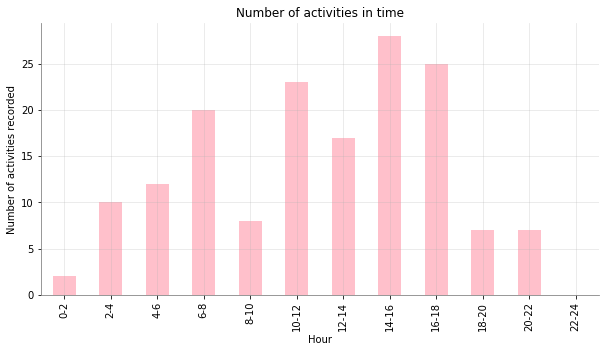

In [59]:
ax = df_Pol[['Activity']].groupby(df_Pol['Hour_bin']).agg('count').reset_index().plot.bar(x='Hour_bin', 
                                                                                          figsize=(10,5),
                                                                                          color='pink')
ax.get_legend().remove()
ax.set_xlabel('Hour')
ax.set_ylabel('Number of activities recorded')
ax.set_title('Number of activities in time')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color(None)
ax.spines['left'].set_color('0.5')
ax.spines['right'].set_color(None)
ax.grid(alpha=0.3)
plt.show()

The plot above shows how many activities were recorded in a given day time (summing for the whole 9 days period). Afternoon hours are the most popular for trainings, but also many trainings hold in the morning (between 6am and 8am). In the night people usually do not exercise.

Let's check how many people post tweets.

In [19]:
df_Pol[['Activity']].groupby(df_Pol['User']).agg('count').sort_values('Activity', ascending=False)

,Activity
User,
Ireneusz Harazim,18
CezaryK,16
Laufbomba,15
puzio wiktor,11
Mariusz Kuchta,10
Krzysztof Człapski,9
Pepe Go,8
Filip Pawłowski,7
Daniel Janiszewski,6


In [20]:
len(set(df_Pol['User']))

38

Only 38 people posted 159 Endomondo tweets. A few of them are regular users. I will check where they post their Endomondo tweets.

In [26]:
df_Pol.loc[df_Pol['User'].isin(['Ireneusz Harazim','CezaryK','Laufbomba','puzio wiktor','Mariusz Kuchta'])][['User','City','Activity']].groupby(['User', 'City']).agg('count')

Activity
User             City                       
CezaryK          Gdynia                    1
                 Warsaw                   15
Ireneusz Harazim Tarnowskie Góry          18
Laufbomba        Poznan                   15
Mariusz Kuchta   Elbląg                    1
                 Starogard Gdański         9
puzio wiktor     Komańcza                  1
                 Krakow                    8
                 Rzeszów                   2

As we can see, our best sportsman trains only in Tarnowskie Góry, whereas some of them recorded their activities in different places.

Let's look not only on Poland...

In [27]:
from datetime import datetime
from datetime import timedelta
today = datetime.today()
yesterday = today - timedelta(days=1)
print(yesterday)                              # only from the previous 24 hours

2019-12-11 20:30:36.276772


In [28]:
search_words = "endomondo" + " -filter:retweets"

tweets = tw.Cursor(api.search,
              q=search_words).items(1000)

i = 1
coord = []
city = []
country = []
date = []
text = []
for tweet in tweets:
    if (tweet.created_at >= yesterday) & (tweet.geo != None):
        print(i)
        print(tweet.geo)                               # collecting coordinates,
        print(tweet.text)                              # text content,
        print(tweet.created_at) 
        coord.append(tweet.geo)
        if tweet.place != None:
            city.append(tweet.place.name)              # city and country name
            country.append(tweet.place.country)
        else:
            city.append(None)
            country.append(None)
        date.append(tweet.created_at)
        text.append(tweet.text)
        i += 1

1
{'type': 'Point', 'coordinates': [53.56446, -2.367045]}
I was out running 2.44 miles with #Endomondo #endorphins https://t.co/N7URr6LhFW
2019-12-12 19:28:33
2
{'type': 'Point', 'coordinates': [50.800707, -1.061663]}
I was out running 4.43 km with #Endomondo #endorphins https://t.co/BrR3DjtuSY
2019-12-12 19:28:18
3
{'type': 'Point', 'coordinates': [37.48202856, 13.9872891]}
I just finished exercising 1.02 km in 4m:36s with #Endomondo #endorphins https://t.co/mgBxdAe8up
2019-12-12 19:28:01
4
{'type': 'Point', 'coordinates': [37.49059327, 13.99309348]}
I just finished running 3.60 km in 53m:39s with #Endomondo #endorphins https://t.co/FF4OPmQ54k
2019-12-12 19:16:45
5
{'type': 'Point', 'coordinates': [40.906187, -5.21387]}
I just finished running 6.14 km in 36m:19s with #Endomondo #endorphins https://t.co/Zt72VfDQYP
2019-12-12 19:16:23
6
{'type': 'Point', 'coordinates': [40.41799919, -3.69617237]}
Madrid - DIA 2. I was out running 9.36 km with #Endomondo #endorphins https://t.co/sgmbRM5s

50
{'type': 'Point', 'coordinates': [50.04645791, 22.0047115]}
I was out running 9.11 km with #Endomondo #endorphins https://t.co/AoCsBeBOQb
2019-12-12 16:28:23
51
{'type': 'Point', 'coordinates': [50.79430413, -1.1490368]}
I just finished cycling 14.18 km in 34m:46s with #Endomondo #endorphins https://t.co/B8LQU68LD4
2019-12-12 16:21:48
52
{'type': 'Point', 'coordinates': [25.524066, -103.421727]}
I just finished running 3.17 km in 20m:15s with #Endomondo #endorphins https://t.co/ny0Cdq5Vsr
2019-12-12 16:20:43
53
{'type': 'Point', 'coordinates': [47.97059049, 21.71193028]}
I was out running 5.53 km with #Endomondo #endorphins https://t.co/sQuQhuC03H
2019-12-12 16:18:03
54
{'type': 'Point', 'coordinates': [-6.2654291, 106.8006506]}
I just finished running 3.40 km in 34m:07s with #Endomondo #endorphins https://t.co/vx8HOyAej0
2019-12-12 16:18:02
55
{'type': 'Point', 'coordinates': [50.441813, 18.816332]}
I was out walking 0.58 km with #Endomondo #endorphins https://t.co/KqFR3SfNUJ
2019-

104
{'type': 'Point', 'coordinates': [37.17658, -3.61276]}
I just finished running 8.02 km in 41m:59s with #Endomondo #endorphins https://t.co/qBEWBUB0Hn
2019-12-12 13:48:02
105
{'type': 'Point', 'coordinates': [24.86801, 91.876492]}
I was out cycling 2.05 km with #Endomondo #endorphins https://t.co/0MQTt3R2s5
2019-12-12 13:44:36
106
{'type': 'Point', 'coordinates': [-23.729274, -46.563446]}
I just began a running workout using #Endomondo. Peptalk me now @ https://t.co/7VudTWWzha
2019-12-12 13:38:03
107
{'type': 'Point', 'coordinates': [-6.33844346, 106.81581144]}
I just finished running 2.05 km in 12m:09s with #Endomondo #endorphins https://t.co/hwiwRmJpKy
2019-12-12 13:37:41
108
{'type': 'Point', 'coordinates': [-6.219855, 106.80177]}
I just finished running 3.72 km in 43m:23s with #Endomondo #endorphins https://t.co/1MXxfAzNvj
2019-12-12 13:36:45
109
{'type': 'Point', 'coordinates': [-6.33846986, 106.8157293]}
I just finished cycling 17.69 km in 54m:14s with #Endomondo #endorphins h

154
{'type': 'Point', 'coordinates': [43.55131, 7.014574]}
I just finished running 12.04 km in 1h:25m:23s with #Endomondo #endorphins https://t.co/DruxGYNyAf
2019-12-12 12:09:11
155
{'type': 'Point', 'coordinates': [-33.446797, -70.657004]}
I was out cycling 14.99 km with #Endomondo #endorphins https://t.co/cEGlGwflAh
2019-12-12 12:05:45
156
{'type': 'Point', 'coordinates': [13.69156483, 100.35974398]}
I was out running 7.01 km with #Endomondo #endorphins https://t.co/9KujBvfvPP
2019-12-12 12:04:05
157
{'type': 'Point', 'coordinates': [53.19897667, 5.81779333]}
I was out walking 2.56 km with #Endomondo #endorphins https://t.co/N4j0m0BzJq
2019-12-12 12:03:06
158
{'type': 'Point', 'coordinates': [-0.967675, -80.467131]}
I just finished running 5.07 km in 34m:17s with #Endomondo #endorphins https://t.co/ce7ZUYKVya
2019-12-12 11:54:11
159
{'type': 'Point', 'coordinates': [18.0299284, -76.7772214]}
I just finished running 0.01 km in 48m:25s with #Endomondo #endorphins https://t.co/A8n3iCjQL

201
{'type': 'Point', 'coordinates': [-3.739489, -38.537795]}
I just finished cycling 10.91 km in 34m:05s with #Endomondo #endorphins https://t.co/ctMKHSUaV3
2019-12-12 09:06:39
202
{'type': 'Point', 'coordinates': [47.9027352, 1.910404]}
I just finished cycling 3.80 km in 14m:33s with #Endomondo #endorphins https://t.co/7biGgUse3A
2019-12-12 09:00:07
203
{'type': 'Point', 'coordinates': [41.37721932, 1.93406942]}
I just finished running 7.29 km in 45m:45s with #Endomondo #endorphins https://t.co/m8vG6MYHUy
2019-12-12 08:59:09
204
{'type': 'Point', 'coordinates': [-7.947663, -34.826292]}
I just began a cycling workout using #Endomondo. Peptalk me now @ https://t.co/eNHvliINc6
2019-12-12 08:53:47
205
{'type': 'Point', 'coordinates': [48.780249, 2.209538]}
I just finished cycling 6.10 km in 29m:51s with #Endomondo #endorphins https://t.co/4ZqSrwmQBQ
2019-12-12 08:53:17
206
{'type': 'Point', 'coordinates': [37.64969956, -1.01066189]}
I just finished running 10.70 km in 1h:28m:28s with #En

254
{'type': 'Point', 'coordinates': [51.695359, 39.204625]}
I was out walking 5.98 km with #Endomondo #endorphins https://t.co/p7ECssV7Jp
2019-12-12 04:57:29
255
{'type': 'Point', 'coordinates': [8.05340029, 98.75126674]}
I just finished walking 2.03 km in 36m:27s with #Endomondo #endorphins https://t.co/gdxov6WP2g
2019-12-12 04:52:05
256
{'type': 'Point', 'coordinates': [22.5158776, 88.3664623]}
I just finished running 7.01 km in 45m:05s with #Endomondo #endorphins https://t.co/oRj0Q53Rla
2019-12-12 04:48:55
257
{'type': 'Point', 'coordinates': [-6.23759894, 106.7608337]}
I just finished cycling 17.76 km in 59m:53s with #Endomondo #endorphins https://t.co/QuwPrGRHYW
2019-12-12 04:48:53
258
{'type': 'Point', 'coordinates': [-34.3562522, 21.4114855]}
I just finished running 7.42 km in 48m:54s with #Endomondo #endorphins https://t.co/pTU9LTjGGj
2019-12-12 04:39:25
259
{'type': 'Point', 'coordinates': [32.91420842, -105.93458709]}
I just finished running 3.12 miles in 31m:33s with #Endom

301
{'type': 'Point', 'coordinates': [-6.24501256, 106.87444327]}
I just finished running 2.65 km in 28m:27s with #Endomondo #endorphins https://t.co/UpusRLkWa3
2019-12-12 00:23:02
302
{'type': 'Point', 'coordinates': [-6.1910345, 106.8895771]}
I just finished walking 1.13 km in 10m:13s with #Endomondo #endorphins https://t.co/9K5rFrVhef
2019-12-12 00:22:15
303
{'type': 'Point', 'coordinates': [-7.60448425, 111.89618764]}
I just finished cycling 13.61 km in 1h:02m:53s with #Endomondo #endorphins https://t.co/wfyMw8bVtv
2019-12-12 00:14:59
304
{'type': 'Point', 'coordinates': [-6.291498, 106.796503]}
I just finished cycling 8.29 km in 55m:24s with #Endomondo #endorphins https://t.co/E7hfKl77Eg
2019-12-12 00:12:12
305
{'type': 'Point', 'coordinates': [8.08097902, 98.90961086]}
I was out running 8.34 km with #Endomondo #endorphins https://t.co/bJcUWHXz22
2019-12-12 00:12:05
306
{'type': 'Point', 'coordinates': [-8.53654241, 115.1339886]}
I just finished running 10.00 km in 1h:07m:28s with

356
{'type': 'Point', 'coordinates': [52.718573, -2.733405]}
I just finished mountain biking 15.28 miles in 3h:46m:47s with #Endomondo #endorphins https://t.co/Qgx8wXc1Lg
2019-12-11 22:05:35
357
{'type': 'Point', 'coordinates': [40.25100008, -3.82242923]}
I just finished running 6.24 km in 32m:21s with #Endomondo #endorphins https://t.co/6osf7c72v2
2019-12-11 21:56:37
358
{'type': 'Point', 'coordinates': [47.010705, -124.1546]}
I was out running 3.05 miles with #Endomondo #endorphins https://t.co/Uw7bynT6Tz
2019-12-11 21:54:12
359
{'type': 'Point', 'coordinates': [52.58359278, -1.19465422]}
I just finished running 10.00 miles in 1h:17m:15s with #Endomondo #endorphins https://t.co/7h63nKYI3u
2019-12-11 21:44:07
360
{'type': 'Point', 'coordinates': [38.88429332, -77.11737823]}
I was out running 3.40 miles with #Endomondo #endorphins https://t.co/FX2tWwK6c9
2019-12-11 21:34:32


In [29]:
locationlist = [dic['coordinates'] if dic != None else dic for dic in coord]

In [30]:
df_world = pd.DataFrame(list(zip(locationlist, country, city, date, text)), columns=['Location','Country','City','Date','Text'])

In [31]:
df_world['Activity'] = ''
df_world['Col'] = ''

In [32]:
for i in range(len(df_world)):
    text = df_world['Text'][i]
    if any(word in text for word in key_words_running):
        df_world.loc[i, 'Activity'] = 'running'
        df_world.loc[i, 'Col'] = 'lightred'
    elif any(word in text for word in key_words_cycling):
        df_world.loc[i, 'Activity'] = 'cycling'
        df_world.loc[i, 'Col'] = 'lightgreen'
    elif any(word in text for word in key_words_walking):
        df_world.loc[i, 'Activity'] = 'walking'
        df_world.loc[i, 'Col'] = 'lightblue'
    elif any(word in text for word in key_words_weight):
        df_world.loc[i, 'Activity'] = 'weight training'
        df_world.loc[i, 'Col'] = 'beige'
    elif any(word in text for word in key_words_exercising):
        df_world.loc[i, 'Activity'] = 'exercising'
        df_world.loc[i, 'Col'] = 'lightgray'
    elif any(word in text for word in key_words_hiking):
        df_world.loc[i, 'Activity'] = 'hiking'
        df_world.loc[i, 'Col'] = 'orange'
    elif any(word in text for word in key_words_tennis):
        df_world.loc[i, 'Activity'] = 'tennis'
        df_world.loc[i, 'Col'] = 'green'
    elif any(word in text for word in key_words_skating):
        df_world.loc[i, 'Activity'] = 'skating'
        df_world.loc[i, 'Col'] = 'blue'
    elif any(word in text for word in key_words_yoga):
        df_world.loc[i, 'Activity'] = 'yoga'
        df_world.loc[i, 'Col'] = 'red'
    elif any(word in text for word in key_words_snowboarding):
        df_world.loc[i, 'Activity'] = 'snowboarding'
        df_world.loc[i, 'Col'] = 'pink'
    elif any(word in text for word in key_words_martialarts):
        df_world.loc[i, 'Activity'] = 'martial arts'
        df_world.loc[i, 'Col'] = 'purple'
    elif any(word in text for word in key_words_pilates):
        df_world.loc[i, 'Activity'] = 'pilates'
        df_world.loc[i, 'Col'] = 'darkpurple'

In [33]:
df_world[df_world['Activity'] == '']     # all categorized

,Location,Country,City,Date,Text,Activity,Col


In [34]:
mapa = folium.Map(location=[52.1912457, 19.3518914], zoom_start=2)
#marker_cluster = MarkerCluster().add_to(mapa)
for point in range(0, len(df_world)):
    mapa.add_child(folium.Marker(df_world['Location'][point], popup=df_world['Activity'][point], icon=folium.Icon(color=df_world['Col'][point], icon=''))) #.add_to(marker_cluster)
mapa

Here I didn't grouped the points on the map, so we can see in the first sight the most popular sports (colors) and their seating.

In [35]:
min(df_world['Date'])   # tweets only since this date (api search stuck at this date for whole world)

Timestamp('2019-12-11 21:34:32')

In [46]:
df_world.groupby('Activity').size().sort_values(ascending=False)

Activity
running            186
cycling             88
walking             73
exercising           3
skating              2
hiking               2
yoga                 1
weight training      1
tennis               1
snowboarding         1
pilates              1
martial arts         1
dtype: int64

As we can see above, Endomondo users most often track their running exercises. It is followed by cycling and walking. Other activities are rather occasional. It is also visualized on a bar plot below.

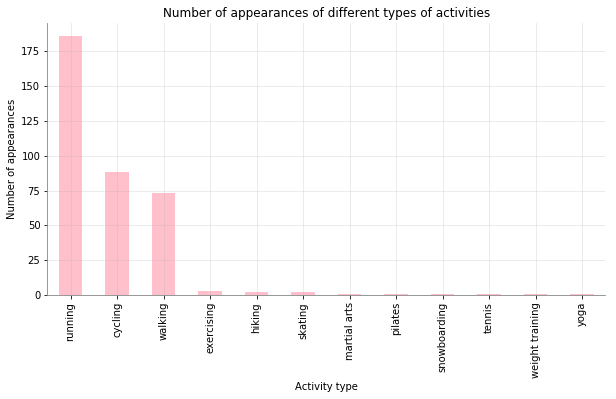

In [60]:
ax = df_world[['Country']].groupby(df_world['Activity']).agg('count').sort_values('Country', ascending=False).reset_index().plot.bar(x='Activity',
                                                                                                                                     figsize=(10,5),
                                                                                                                                     color='pink')
ax.get_legend().remove()
ax.set_xlabel('Activity type')
ax.set_ylabel('Number of appearances')
ax.set_title('Number of appearances of different types of activities')
ax.spines['bottom'].set_color('0.5')
ax.spines['top'].set_color(None)
ax.spines['left'].set_color('0.5')
ax.spines['right'].set_color(None)
ax.grid(alpha=0.3)
plt.show()

In [47]:
df_world.groupby('Country').size().sort_values(ascending=False)

Country
Indonesia                           57
Thailand                            35
Spain                               32
United Kingdom                      24
Brazil                              18
Poland                              16
United States                       15
Chile                               14
Mexico                              13
Argentina                           10
India                                9
France                               8
Russia                               8
The Netherlands                      6
Germany                              6
Italy                                6
Japan                                5
South Africa                         4
Bangladesh                           4
Latvia                               4
Denmark                              4
Ireland                              4
Hellas                               3
Australia                            3
Republic of Korea                    3
Malaysia         

Above we can see that Indonesians post Endomondo tweets most often. In this ranking Poland is quite at the top. In df_world data frame I have the tweets from almost all past 24 hours, so each country, no matter in which time zone it is, should contribute equally. Checking the column 'City' does not make sense, because in many cases these are only districts, not whole cities.